## <center><h1><b><i>Regression Model</i></b></h1></center>

# ***Importing Libraries***

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

# ***Reading Data***

In [8]:
df = pd.read_csv('airfoil_self_noise.csv')
df.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [31]:
df = df.rename(columns = {"attack-angle": "attack_angle","chord-length": "chord_length", "free-stream-velocity": "free_stream_velocity", "suction-side-displacement-thickness": "suction_side_displacement_thickness", "scaled-sound-pressure": "scaled_sound_pressure"})
df.head()

,frequency,attack_angle,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


# ***Data Modeling***

### ***Correlation***

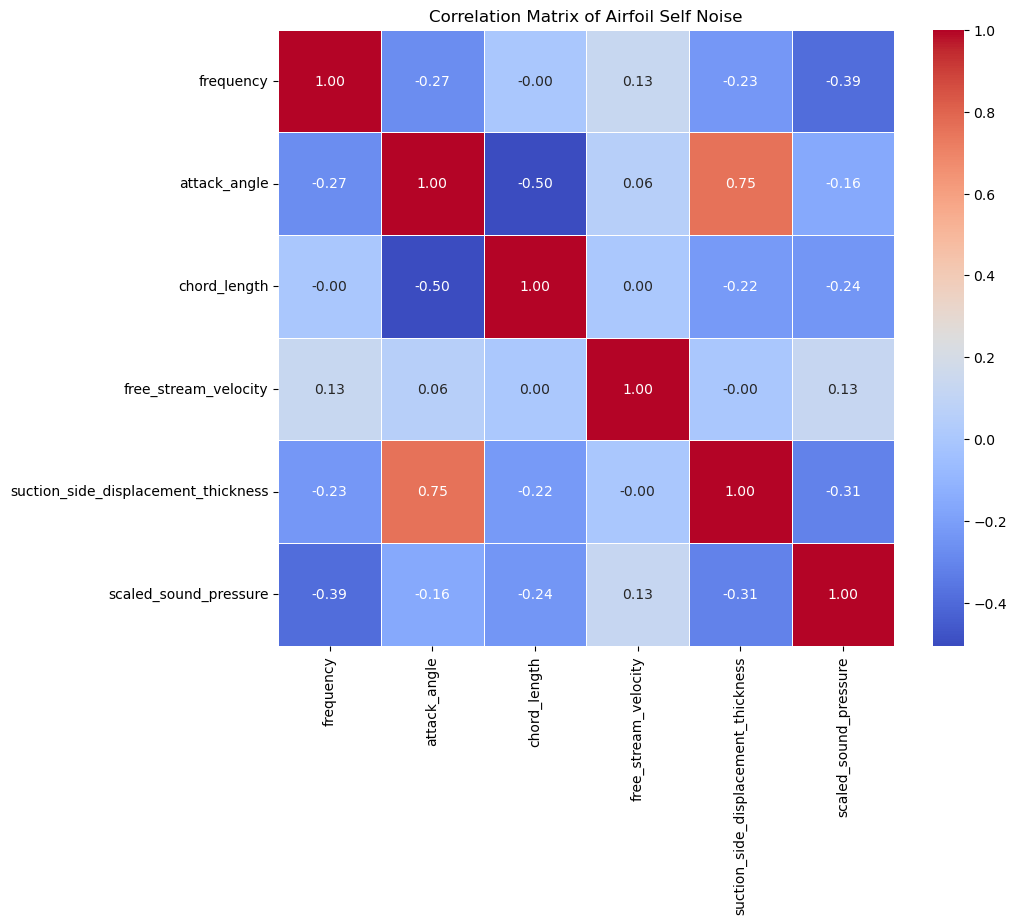

In [50]:
correlation = df.corr()

# Plotting the heatmap for visualizing correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Airfoil Self Noise")
plt.savefig(r'C:\Users\kurap\Downloads\plots\my_plot.png')
plt.show()

***Preparing Data***

In [51]:
df.head()

,frequency,attack_angle,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


### **My target Variable is scaled_sound_pressure**

In [34]:
X=df.drop(['scaled_sound_pressure'],axis='columns')
y=df['scaled_sound_pressure']
X.head()

,frequency,attack_angle,chord_length,free_stream_velocity,suction_side_displacement_thickness
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


In [60]:
model = LinearRegression()
model.fit(X_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('R^2:', model.score(X_train, y_train))

intercept: 134.52276908775679
slope: [-2.11175257e-03 -6.92489109e-01 -6.17341225e+01  1.54784401e-01
  1.01989135e+02 -8.28846176e-04  6.34854009e-04  3.53569607e+01
 -2.77545641e-04 -1.87181012e+03  8.28911824e-04  6.34852429e-04
  3.53569607e+01 -2.77518391e-04 -1.87181012e+03]
R^2: 0.53293174861329


In [61]:
yhat = model.predict(X_test)
print('RMSE:', root_mean_squared_error(y_test, yhat))

RMSE: 4.515864108496743


In [62]:
X['frequencysquared'] = np.square(df.frequency)
X['attack_anglesquared'] = np.square(df.attack_angle)
X['chord_lengthsquared'] = np.square(df.chord_length)
X['free_stream_velocitysquared'] = np.square(df.free_stream_velocity)
X['suction_side_displacement_thicknesssquared'] = np.square(df.suction_side_displacement_thickness)
X.head()

,frequency,attack_angle,chord_length,free_stream_velocity,suction_side_displacement_thickness,L1squared,L2squared,L3squared,Hsquared,Wsquared,frequencysquared,attack_anglesquared,chord_lengthsquared,free_stream_velocitysquared,suction_side_displacement_thicknesssquared
0,800,0.0,0.3048,71.3,0.002663,640000,0.0,0.092903,5083.69,0.000007,640000,0.0,0.092903,5083.69,0.000007
1,1000,0.0,0.3048,71.3,0.002663,1000000,0.0,0.092903,5083.69,0.000007,1000000,0.0,0.092903,5083.69,0.000007
2,1250,0.0,0.3048,71.3,0.002663,1562500,0.0,0.092903,5083.69,0.000007,1562500,0.0,0.092903,5083.69,0.000007
3,1600,0.0,0.3048,71.3,0.002663,2560000,0.0,0.092903,5083.69,0.000007,2560000,0.0,0.092903,5083.69,0.000007
4,2000,0.0,0.3048,71.3,0.002663,4000000,0.0,0.092903,5083.69,0.000007,4000000,0.0,0.092903,5083.69,0.000007


In [63]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)


print('R squared:', model.score(X,y))
print('RMSE', root_mean_squared_error(y_test, yhat))

R squared: 0.5504809166353586
RMSE 4.937676947686219


**After performing polynomial regression, the RMSE value has gone up, this indicates that polynomial regression didn't improve the model.**